# How Sum: Dynamic Programming

Write a function “`howSum(targetSum, numbers)`’ that takes in a
`targetSum` and an array of `numbers` as arguments.

The function should return an array containing any combination of
elements that add up to exactly the `targetSum`. If there is no
combination that adds up to the `targetSum`, then return `null`.

If there are multiple combinations possible, you may return any
single one.

**Examples**:


`how_sum(7, [5, 3, 4, 7])`  --> `[3, 4] & [7]`

`how_sum(8, [2, 3, 5])`  --> `[2,2,2,2] & [3, 5]`

`how_sum(7, [5,  4])`  --> `None`

`how_sum(0, [5,  4])`  --> `[ ]`



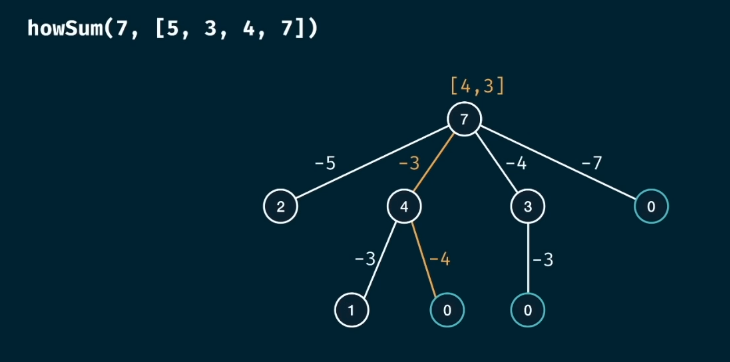

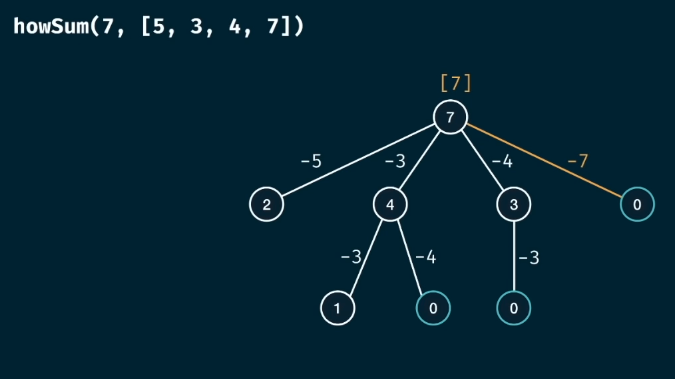

![Alt text](images/howsum-3.png)

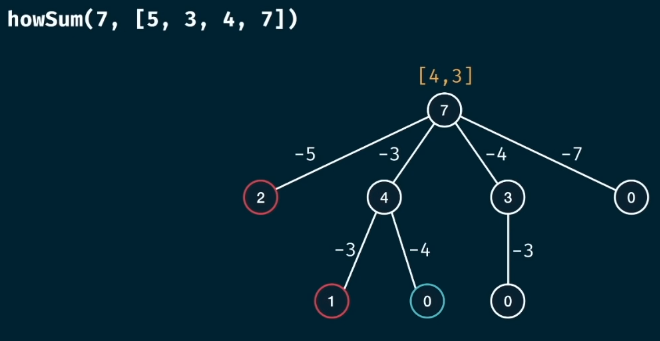

In [1]:
# Brute Force
# time: O(n^m * m)
# Space: O(m)
def how_sum(target_sum, numbers):
    if target_sum == 0:
        return []
    if target_sum < 0:
        return None
    for num in numbers:
        remainder = target_sum - num
        remainder_result = how_sum(remainder, numbers)
        if remainder_result is not None:
            return remainder_result + [num]
    return None

print(how_sum(7, [5, 3, 4, 7]))  # Output: [7]
print(how_sum(8, [2, 3, 5]))  # Output: [2, 2, 2, 2]
print(how_sum(7, [5, 4]))  # Output: None
print(how_sum(30, [7, 4]))  # Output: None


[4, 3]
[2, 2, 2, 2]
None
[4, 4, 4, 4, 7, 7]


In [2]:
# return any single solution.
# Memoization
# time: O(n*m^2)
# Space: O(m^2)
def how_sum(target_sum, numbers, memo=None):
    if memo is None:
        memo = {}
    if target_sum in memo:
        return memo[target_sum]
    if target_sum == 0:
        return []
    if target_sum < 0:
        return None
    for num in numbers:
        remainder = target_sum - num
        remainder_result = how_sum(remainder, numbers, memo)
        if remainder_result is not None:
            combination = remainder_result + [num]
            memo[target_sum] = combination
            return combination
    memo[target_sum] = None
    return None

print(how_sum(7, [5, 3, 4, 7]))  # Output: [7]
print(how_sum(8, [2, 3, 5]))  # Output: [2, 2, 2, 2]
print(how_sum(7, [5, 4]))  # Output: None
print(how_sum(30, [7, 4]))  # Output: []


[4, 3]
[2, 2, 2, 2]
None
[4, 4, 4, 4, 7, 7]


In [17]:
# return all pissible solutions (backtracking).

def how_sum(target_sum, numbers):
    if target_sum == 0:
        return [[]]
    if target_sum < 0:
        return []
    result = []
    for num in numbers:
        remainder = target_sum - num
        remainder_combinations = how_sum(remainder, numbers)
        for combination in remainder_combinations:
            result.append(combination + [num])
    return result

print(how_sum(7, [5, 3, 4, 7]))  # Output: [[3, 4], [7]]
print(how_sum(8, [2, 3, 5]))  # Output: [[2, 2, 2, 2], [3, 5]]
print(how_sum(7, [5, 4]))  # Output: []
print(how_sum(0, [5, 4]))  # Output: [[]]
print(how_sum(20, [5, 4]))  



[[4, 3], [3, 4], [7]]
[[2, 2, 2, 2], [3, 3, 2], [3, 2, 3], [2, 3, 3], [5, 3], [3, 5]]
[]
[[]]
[[5, 5, 5, 5], [4, 4, 4, 4, 4]]


In [22]:
def how_sum(target_sum, numbers, memo=None):
    if memo is None:
        memo = {}
    if target_sum in memo:
        return memo[target_sum]
    if target_sum == 0:
        return [[]]
    if target_sum < 0:
        return []
    result = []
    for num in numbers:
        remainder = target_sum - num
        remainder_combinations = how_sum(remainder, numbers, memo)
        for combination in remainder_combinations:
            new_combination = combination + [num]
            result.append(new_combination)
    memo[target_sum] = result
    return result

print(how_sum(7, [5, 3, 4, 7]))  # Output: [[3, 4], [7]]
print(how_sum(8, [2, 3, 5]))  # Output: [[2, 2, 2, 2], [3, 5]]
print(how_sum(7, [5, 4]))  # Output: []
print(how_sum(0, [5, 4]))  # Output: [[]]
print(how_sum(20, [5, 4]))


[[4, 3], [3, 4], [7]]
[[2, 2, 2, 2], [3, 3, 2], [3, 2, 3], [2, 3, 3], [5, 3], [3, 5]]
[]
[[]]
[[5, 5, 5, 5], [4, 4, 4, 4, 4]]


In [3]:
# each number in the array can be used only once
def how_sum(target_sum, numbers, memo=None):
    if memo is None:
        memo = {}
    if target_sum in memo:
        return memo[target_sum]
    if target_sum == 0:
        return [[]]
    if target_sum < 0:
        return []
    result = []
    for i in range(len(numbers)):
        num = numbers[i]
        remainder = target_sum - num
        remainder_combinations = how_sum(remainder, numbers[:i] + numbers[i+1:], memo)
        for combination in remainder_combinations:
            new_combination = combination + [num]
            result.append(new_combination)
    memo[target_sum] = result
    return result

print(how_sum(7, [5, 3, 4, 7]))  # Output: [[3, 4], [7]]
print(how_sum(8, [2, 3, 5]))  # Output: [[3, 5]]
print(how_sum(7, [5, 4]))  # Output: []
print(how_sum(0, [5, 4]))  # Output: [[]]


[[4, 3], [3, 4], [7]]
[[5, 3]]
[]
[[]]


In [2]:
def how_sum(target_sum, numbers):
    table = [[] for _ in range(target_sum + 1)]
    table[0] = [[]]

    for i in range(target_sum):
        if table[i]:
            for num in numbers:
                if i + num <= target_sum:
                    for combination in table[i]:
                        table[i + num].append(combination + [num])

    return table[target_sum]

print(how_sum(7, [5, 3, 4, 7]))  # Output: [[3, 4], [7]]
print(how_sum(8, [2, 3, 5]))  # Output: [[3, 5]]
print(how_sum(7, [5, 4]))  # Output: []
print(how_sum(0, [5, 4]))  # Output: [[]]


[[7], [3, 4], [4, 3]]
[[3, 5], [5, 3], [2, 3, 3], [3, 2, 3], [3, 3, 2], [2, 2, 2, 2]]
[]
[[]]


# Backtracking and Dynamic Programming:

**Backtracking**:
- Backtracking is a technique for finding all (or some) solutions to computational problems, particularly constraint satisfaction problems.
- It incrementally builds candidates for the solutions, but abandons a candidate as soon as it determines that the candidate cannot possibly be extended to a valid solution.
- Backtracking is useful when you need to find all possible solutions and have constraints to consider⁴.

**Dynamic Programming**:
- Dynamic Programming (DP) is a method for solving complex problems by breaking them down into simpler subproblems.
- It solves each subproblem just once and stores the result of each subproblem to avoid duplicate work.
- DP relies on the principle of optimality, which means that the solution to a problem is composed of solutions to its subproblems.
- DP is used to find the optimal solution and reuses previously computed results.

**Key Differences**:
- The major difference between the two is that dynamic programming is used for optimization problems where we need to find the best solution, while backtracking is used to find all possible solutions.
- In dynamic programming, subproblems overlap and are solved many times, while in backtracking, each potential solution is generated and checked only once.
- Dynamic programming uses a bottom-up approach, solving all related subproblems first, while backtracking uses a top-down approach, generating potential solutions and discarding those that fail to satisfy the constraints.



# Tabulation 

In [9]:
def how_sum(target_sum, numbers):
    table = [None] * (target_sum + 1)
    table[0] = []

    for i in range(target_sum + 1):
        if table[i] is not None:
            for num in numbers:
                if i + num <= target_sum:
                    if table[i + num] is None:
                        table[i + num] = table[i] + [num]
                    else:
                        table[i + num] = min(table[i + num], table[i] + [num], key=len)

    return table[target_sum]

print(how_sum(7, [2, 3]))  # [3, 2, 2]
print(how_sum(7, [5, 3, 4, 7]))  # [4, 3]
print(how_sum(7, [2, 4]))  # None
print(how_sum(8, [2, 3, 5]))  # [2, 2, 2, 2]
print(how_sum(300, [7, 14]))  # None


[2, 2, 3]
[7]
None
[3, 5]
None


In [10]:
def how_sum(target_sum, numbers):
    table = [None] * (target_sum + 1)
    table[0] = []

    for i in range(target_sum + 1):
        if table[i] is not None:
            for num in numbers:
                if i + num <= target_sum:
                    if table[i + num] is None:
                        table[i + num] = table[i] + [num]
                    else:
                        table[i + num] = min(table[i + num], table[i] + [num], key=len)

    return table[target_sum]

print(how_sum(7, [2, 3]))  # [3, 2, 2]
print(how_sum(7, [5, 3, 4, 7]))  # [4, 3]
print(how_sum(7, [2, 4]))  # None
print(how_sum(8, [2, 3, 5]))  # [2, 2, 2, 2]
print(how_sum(300, [7, 14]))  # None


[2, 2, 3]
[7]
None
[3, 5]
None


In [8]:
# all possible solutions 
def how_sum(target_sum, numbers):
    table = [[] for _ in range(target_sum + 1)]
    table[0] = [[]]

    for i in range(target_sum):
        if table[i]:
            for num in numbers:
                if i + num <= target_sum:
                    for combination in table[i]:
                        table[i + num].append(combination + [num])

    return table[target_sum]

print(how_sum(7, [5, 3, 4, 7]))  # Output: [[3, 4], [7]]
print(how_sum(8, [2, 3, 5]))  # Output: [[3, 5]]
print(how_sum(7, [5, 4]))  # Output: []
print(how_sum(0, [5, 4]))  # Output: [[]]


[[7], [3, 4], [4, 3]]
[[3, 5], [5, 3], [2, 3, 3], [3, 2, 3], [3, 3, 2], [2, 2, 2, 2]]
[]
[[]]
